In [1]:
import pandas as pd
import numpy as np

### Dataset creation with French temperatures by regions in 2019

In [2]:
# Import the CSV file with only useful columns
df = pd.read_csv("temperature-quotidienne-departementale.csv", sep=";", usecols=[0, 1, 4])

# Rename columns to simplify syntax
df = df.rename(columns={"Code INSEE département": "Region", "TMax (°C)": "Temp"})

# Select 2019 records only
df = df[(df["Date"] >= "2019-01-01") & (df["Date"] <= "2019-12-31")]

# Pivot table to get "Date" as index and regions as columns
df = df.pivot(index='Date', columns='Region', values='Temp')

# Select a set of regions across France
df = df[["06", "25", "59", "62", "83", "85", "75"]]

display(df)


Region,06,25,59,62,83,85,75
Date,,,,,,,
2019-01-01,15.21,5.9,9.45,9.80,15.56,8.35,8.8
2019-01-02,15.40,5.3,7.80,6.80,15.21,9.40,7.2
2019-01-03,12.83,3.1,6.85,5.85,13.46,6.55,6.6
2019-01-04,12.34,3.7,6.00,5.70,12.46,5.80,6.0
2019-01-05,13.08,2.3,6.80,6.80,12.59,4.75,5.9
...,...,...,...,...,...,...,...
2019-12-27,14.41,9.9,9.00,9.55,16.50,12.85,10.0
2019-12-28,14.65,6.2,7.80,7.70,15.15,11.15,8.6
2019-12-29,13.68,4.3,5.10,6.40,13.93,7.60,6.2


In [3]:
# Convert the Pandas dataframe to a Numpy array with time-series only
f = df.to_numpy().astype(float)

# Create a float vector between 0 and 1 for time index
time = np.linspace(0, 1, len(f))


### FDASRSF package installation and use on the dataset

In [4]:
from fdasrsf import fPCA, time_warping, fdawarp, fdahpca

#### Functional Alignment

In [5]:
# Align time-series
warp_f = time_warping.fdawarp(f, time)
warp_f.srsf_align()


Initializing...
Compute Karcher Mean of 7 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


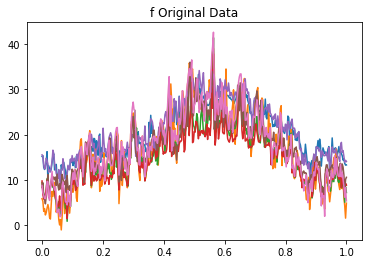

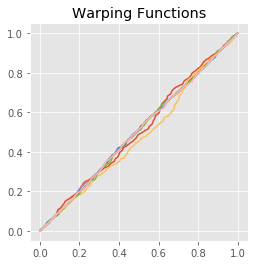

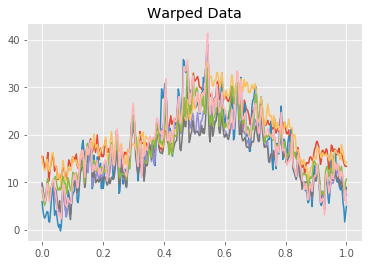

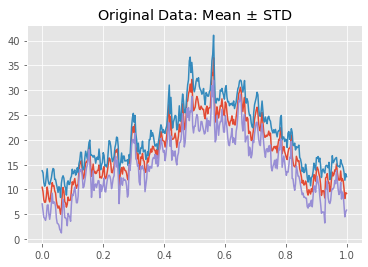

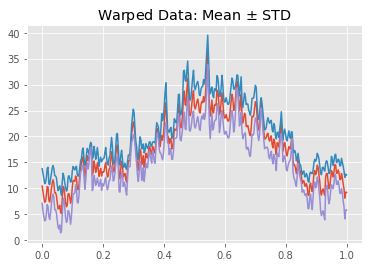

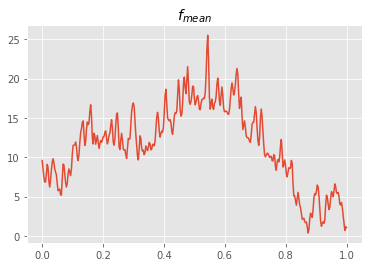

In [6]:
warp_f.plot()


#### Functional Principal Components Analysis

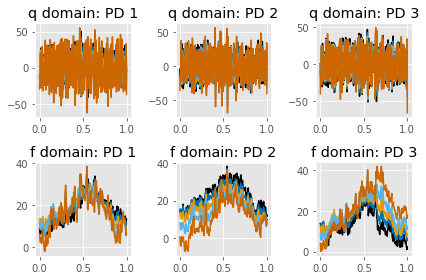

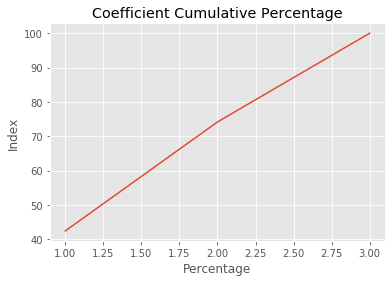

In [7]:
# Define the FPCA as a vertical analysis
fPCA_analysis = fPCA.fdavpca(warp_f)

# Run the FPCA on a 3 components basis
fPCA_analysis.calc_fpca(no=3)
fPCA_analysis.plot()


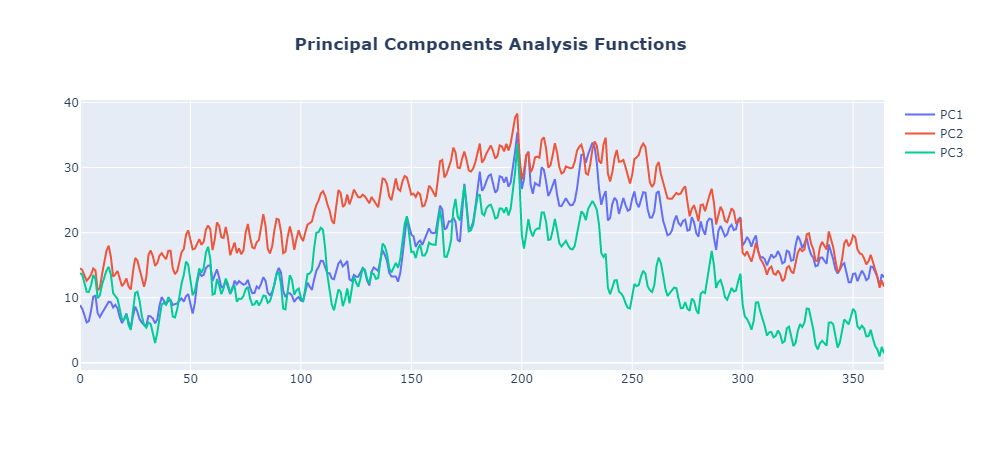

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:, 0, 0], mode='lines', name="PC1"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:, 0, 1], mode='lines', name="PC2"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:, 0, 2], mode='lines', name="PC3"))

fig.update_layout(
    title_text='<b>Principal Components Analysis Functions</b>', title_x=0.5,
)

fig.show()


In [9]:
fPCA_coef = fPCA_analysis.coef
fPCA_coef

array([[ -55.63049235, -116.32234874,  -63.05340528],
       [ 179.24389483,  -71.94348838,   10.44035113],
       [  30.38016791,   76.55493388,    2.68245264],
       [ -44.24770413,   68.72833332, -132.87422769],
       [-102.31391196,  -78.87221984,   64.55276801],
       [ -70.46170656,   64.50241759,   91.30686008],
       [  63.02975226,   57.35237217,   26.94520111]])

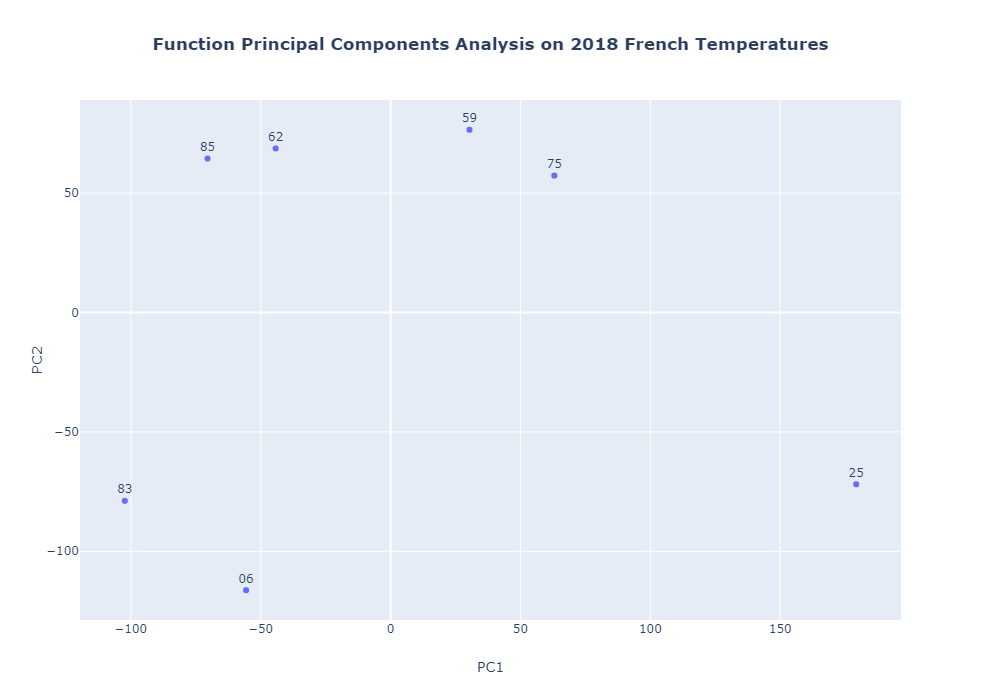

In [10]:
fig = go.Figure(data=go.Scatter(x=fPCA_coef[:, 0], y=fPCA_coef[:, 1], mode='markers+text', text=df.columns))

fig.update_traces(textposition='top center')

fig.update_layout(
    autosize=False,
    width=800,
    height=700,
    title_text='<b>Function Principal Components Analysis on 2018 French Temperatures</b>', title_x=0.5,
    xaxis_title="PC1",
    yaxis_title="PC2",
)
fig.show
